<a href="https://colab.research.google.com/github/SIDDHESH1564/OIBSIP/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("Advertising.csv" )
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
X = df[["TV"]]
y = df[["Sales"]]

# Model

reg_model = LinearRegression().fit(X, y)

# constant (b - bias)
b = reg_model.intercept_[0]

# coefficient of TV (M)
M = reg_model.coef_[0][0]

print("Linear regression parameters at : b = {0}, M = {1}".format(b, M))

Linear regression parameters at : b = 7.032593549127695, M = 0.04753664043301975


In [6]:
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

In [7]:
new_data = [150]
new_data = pd.DataFrame(new_data,columns=['TV'])
reg_model.predict(new_data)

array([[14.16308961]])

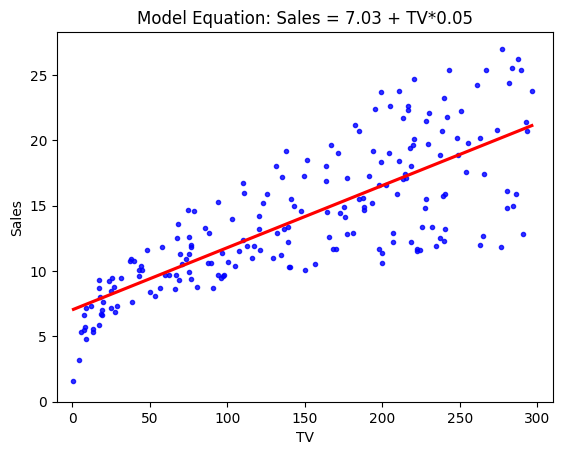

In [8]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_title(f"Model Equation: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [9]:
X = df[['TV','Radio','Newspaper']]
y = df[["Sales"]]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# constant (b - bias)
reg_model.intercept_

# coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [11]:
new_data = [[30], [10], [40]]

new_data = pd.DataFrame(new_data).T
new_data.columns =['TV', 'Radio', 'Newspaper']

reg_model.predict(new_data)

array([[6.202131]])

In [12]:
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.736902590147092

In [13]:
reg_model.score(X_train, y_train)

0.8959372632325174

In [14]:
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581587

In [15]:
reg_model.score(X_test, y_test)

0.8927605914615384

In [16]:
np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=10, scoring="neg_mean_squared_error")))

1.6913531708051797

In [17]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Function that recompiles outliers
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    def check_outlier(dataframe, col_name):
        low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# To access indexes of outliers, index= true must be set
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [18]:
grab_outliers(df, 'Newspaper', index=False)

     Unnamed: 0     TV  Radio  Newspaper  Sales
16           17   67.8   36.6      114.0   12.5
101         102  296.4   36.3      100.9   23.8


In [19]:
grab_outliers(df, 'Newspaper', index=False)

     Unnamed: 0     TV  Radio  Newspaper  Sales
16           17   67.8   36.6      114.0   12.5
101         102  296.4   36.3      100.9   23.8


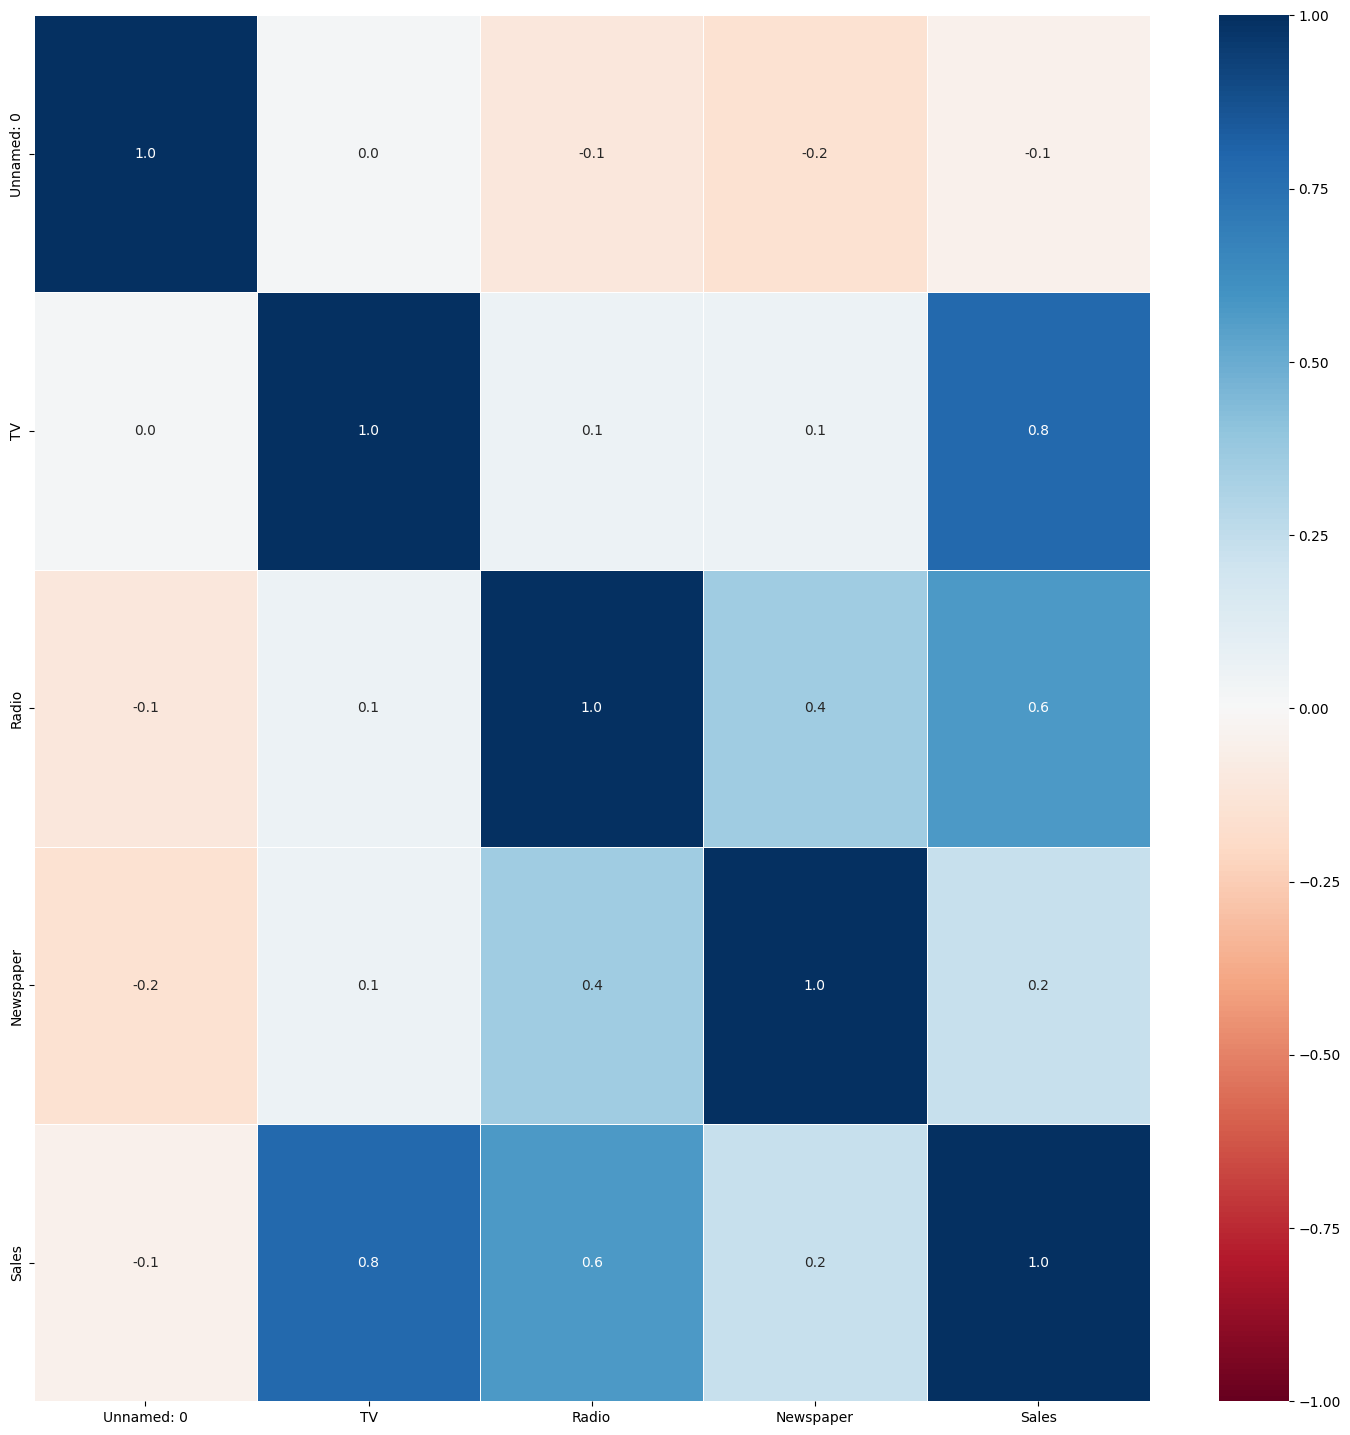

In [20]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5,cmap='RdBu', fmt= '.1f',ax=ax, vmin=-1)
plt.show()

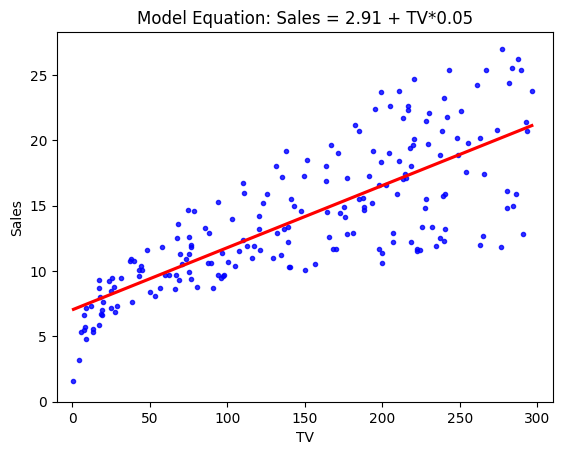

In [21]:
g = sns.regplot(x=X['TV'], y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_title(f"Model Equation: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred = model.predict(X_test)


In [28]:
import numpy as np
from sklearn.metrics import r2_score

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


Mean Squared Error: 3.1740973539761033
Mean Absolute Error: 1.4607567168117603
R-squared Score: 0.899438024100912


In [30]:
new_data = pd.DataFrame([[100, 50, 20], [200, 60, 30]], columns=['TV', 'Radio', 'Newspaper'])
new_sales = model.predict(new_data)
print("Predicted Sales:", new_sales)


Predicted Sales: [[16.96699408]
 [23.35950752]]
